In [78]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [79]:
start=datetime(2015,1,1)
end= datetime(2022,2,1)

#ticker = ['NVDA','GOOGL','COST','TSCO','TSLA','STLD','BNTX','AMZN','AMD','U','NFLX','KO','CRM']
ticker = ['NVDA','GOOGL','COST','TSLA','TSN','BNTX','AMZN','U','CME']

In [80]:
stocks = pdr.get_data_yahoo(ticker,start,end)

In [81]:
df = stocks['Adj Close']
asset_num=len(df.columns)
df.head()

Symbols,NVDA,GOOGL,COST,TSLA,TSN,BNTX,AMZN,U,CME
Date,,,,,,,,,
2015-01-02,4.839470,529.549988,119.534164,43.862000,35.275970,NaN,308.519989,NaN,67.743843
2015-01-05,4.757730,519.460022,118.175148,42.018002,34.463612,NaN,302.190002,NaN,68.128143
2015-01-06,4.613485,506.640015,119.736794,42.256001,34.666691,NaN,295.290009,NaN,67.090553
2015-01-07,4.601463,505.149994,121.821739,42.189999,35.090523,NaN,298.420013,NaN,67.866814
2015-01-08,4.774559,506.910004,122.868401,42.124001,36.379711,NaN,300.459991,NaN,68.181953


In [82]:
returns = df/df.shift(1)
logReturns = np.log(returns)
logReturns = logReturns.drop(logReturns.index[:1])
logReturns.head()

Symbols,NVDA,GOOGL,COST,TSLA,TSN,BNTX,AMZN,U,CME
Date,,,,,,,,,
2015-01-05,-0.017035,-0.019238,-0.011434,-0.042950,-0.023298,NaN,-0.020731,NaN,0.005657
2015-01-06,-0.030787,-0.024989,0.013128,0.005648,0.005875,NaN,-0.023098,NaN,-0.015347
2015-01-07,-0.002609,-0.002945,0.017263,-0.001563,0.012152,NaN,0.010544,NaN,0.011504
2015-01-08,0.036927,0.003478,0.008555,-0.001566,0.036080,NaN,0.006813,NaN,0.004633
2015-01-09,0.004021,-0.012286,-0.015508,-0.018981,-0.020847,NaN,-0.011818,NaN,0.000901


In [83]:
pBar = logReturns.mean()*100 
Sigma = logReturns.cov()*100 

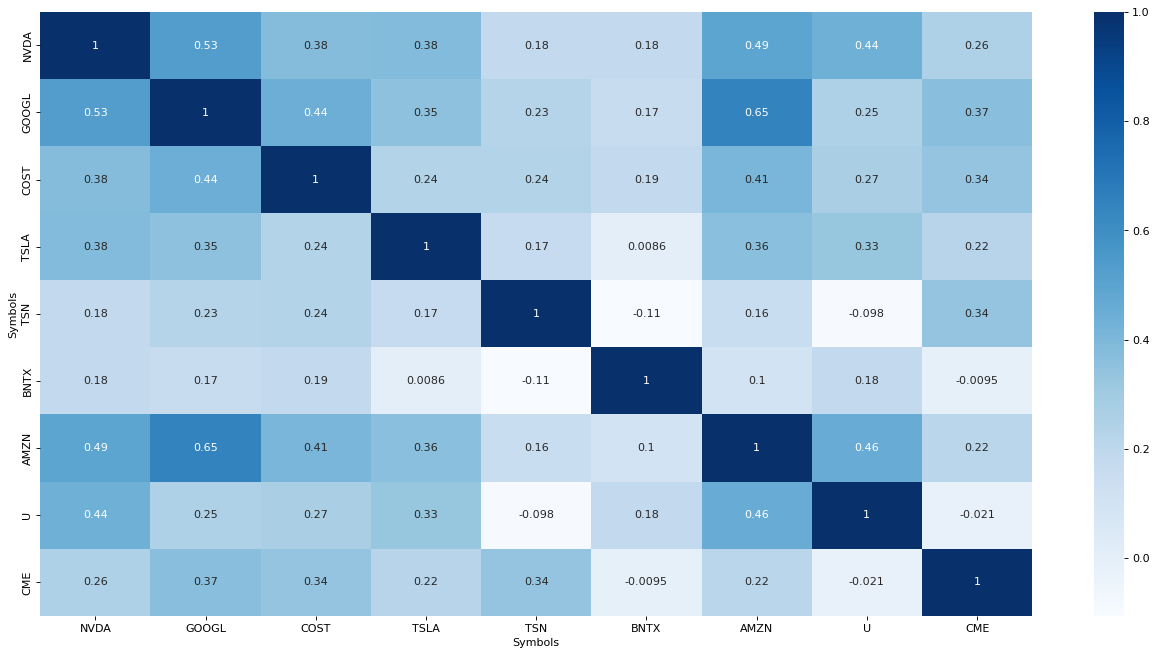

In [84]:
plt.figure(figsize = (20, 10), dpi = 80)
sns.heatmap(logReturns.corr(), annot=True, cmap="Blues")
plt.show()

In [85]:
r_result = []
cov_result = []
for i in range(asset_num):
  cov_result.append(Sigma.iloc[i])
  r_result.append(pBar[i])
r_result = np.array(r_result)
cov_result = np.array(cov_result)
print(r_result)


[0.22041894 0.09244954 0.08110889 0.17136733 0.05318657 0.43551156
 0.12801493 0.13206845 0.06904599]


In [86]:
prets = [] #returns
pvols = [] #volatilities / std / risk
pweights = []
for i in range (100000):
  np.random.seed(i)
  weights = np.random.random(asset_num)
  weights /= np.sum(weights)
  pweights.append(weights)
  prets.append(np.sum(weights * r_result))
  pvols.append(np.sqrt(np.dot(weights.T, np.dot(Sigma, weights))))

[0.04108675 0.19607488 0.16408023 0.01753953 0.15305601 0.12556839
 0.11288499 0.05453684 0.13517239]


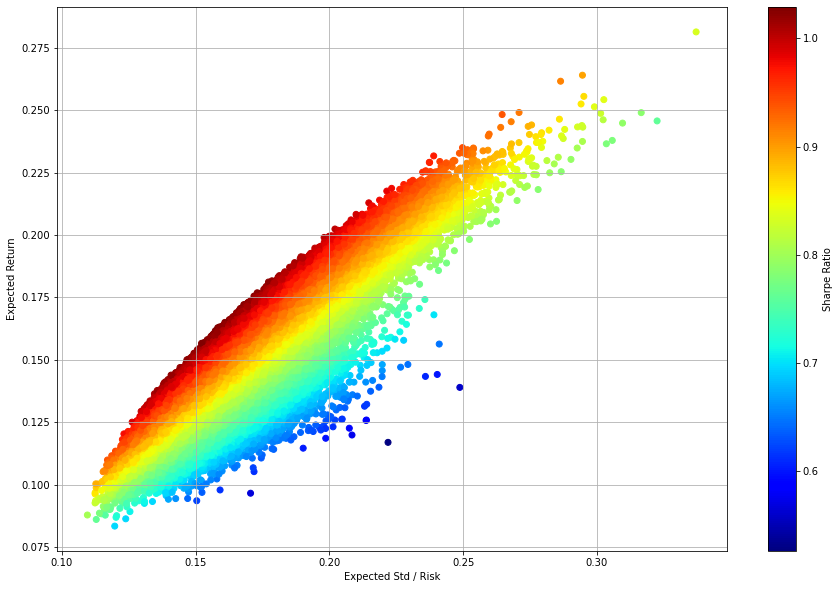

In [87]:
prets = np.array(prets)
pvols = np.array(pvols)
c = prets/pvols
plt.figure(figsize=(15,10))
plt.scatter(pvols, prets, c=c, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('Expected Std / Risk')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()
plt.close()

In [88]:
data = {'Returns':prets, 'Volatility':pvols}

for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in pweights]

portfolios  = pd.DataFrame(data)
rf = 0.01 # risk free
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.181125
Volatility      0.177213
NVDA weight     0.250136
GOOGL weight    0.015736
COST weight     0.034075
TSLA weight     0.123153
TSN weight      0.089953
BNTX weight     0.133563
AMZN weight     0.224340
U weight        0.001360
CME weight      0.127683
Name: 81892, dtype: float64